## Logistic Regression Challenge

In [1]:
#import the required packages here
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
import pandas as pd
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [2]:
feature_names = pd.read_csv(r'..\Smartphone Sensor Data\features.txt', sep='\s+', header=None)
feature_names

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
columns = feature_names.iloc[:,1]

In [4]:
X = pd.read_csv(r'..\Smartphone Sensor Data\train\X_train.txt', sep='\s+', header=None)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [5]:
X = X.rename(columns=columns)
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [7]:
# check for missing values

sum(X.isnull().sum())

0

In [8]:
y = pd.read_csv(r'..\Smartphone Sensor Data\train\y_train.txt', sep='\s+', header=None)
y

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [9]:
target_names = pd.read_csv(r'..\Smartphone Sensor Data\activity_labels.txt', sep='\s+', header=None)
target_names

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [10]:
y = y.rename(columns={0:'target'})
y

,target
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [11]:
# check for missing values

sum(y.isnull().sum())

0

In [12]:
X.shape

(7352, 561)

In [13]:
y.shape

(7352, 1)

### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [14]:
binary_dict = {
    1:1,
    2:1,
    3:1,
    4:0,
    5:0,
    6:0}
y["binary_target"] = y["target"].map(binary_dict)


In [15]:
y_binary = y.iloc[:,1]

In [16]:
y_binary

0       0
1       0
2       0
3       0
4       0
       ..
7347    1
7348    1
7349    1
7350    1
7351    1
Name: binary_target, Length: 7352, dtype: int64

In [17]:
X = X.to_numpy()

In [18]:
X

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [19]:
# isolate feature 54

f_54 = X[:,53]
f_54

array([-0.12321341, -0.11489334, -0.11489334, ..., -0.21600415,
       -0.21054246, -0.21214853])

In [20]:
# split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(f_54, y_binary, test_size=0.20, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5881,)
(1471,)
(5881,)
(1471,)


In [22]:
#sklearn logistic regression

lr = LogisticRegression()

lr.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression()

In [23]:
#Check Train Score
lr.score(X_train.reshape(-1, 1), y_train)

0.7648359122598197

In [24]:
#Check Test Score
lr.score(X_test.reshape(-1, 1), y_test)

0.7634262406526172

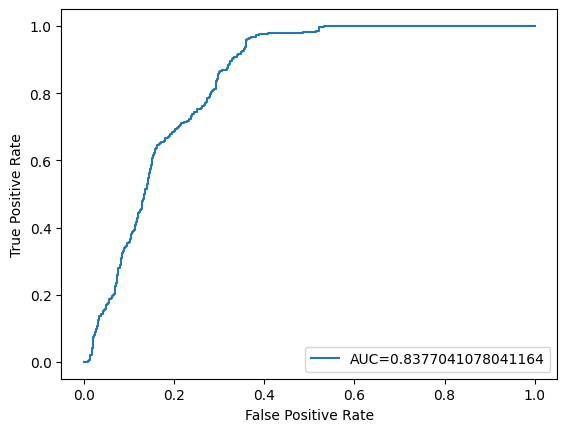

In [25]:
#define metrics
y_pred_proba = lr.predict_proba(X_test.reshape(-1, 1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [26]:
# logistic regression with statsmodel

! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [27]:
! python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [28]:
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [29]:
import statsmodels.api as sm
from statsmodels import discrete
import pandas
from patsy import dmatrices

In [30]:
lr_sm = discrete.discrete_model.Logit(X_train,y_train)

ValueError: endog must be in the unit interval.

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [35]:
y_multi = y.iloc[:,0]
y_multi

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: target, Length: 7352, dtype: int64

In [36]:
# split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.20, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5881, 561)
(1471, 561)
(5881,)
(1471,)


In [40]:
#sklearn logistic regression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [42]:
#Check Train Score
lr.score(X_train, y_train)

0.992688318313212

In [44]:
#Check Test Score
lr.score(X_test, y_test)

0.9809653297076818

In [46]:
y_test

4525    3
1446    3
5995    1
4222    4
6754    3
       ..
3704    6
705     5
1650    4
2260    4
5907    4
Name: target, Length: 1471, dtype: int64

In [53]:
y_pred = lr.predict(X_test)

In [54]:
y_proba = lr.predict_proba(X_test)

In [55]:
# Binarize each label
from sklearn.preprocessing import label_binarize
binary = label_binarize(y_test ,classes=[0,1,2,3,4,5])
binary

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [56]:
from sklearn import metrics

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


threshold 0 :  [1.99999773e+00 9.99997731e-01 2.52441915e-14]
threshold 1 :  [1.99999044e+00 9.99990436e-01 8.75299582e-01 8.71949769e-01
 5.51956946e-01 5.11134121e-01 4.36215945e-01 4.35901161e-01
 1.65637508e-01 1.25247071e-01 1.22911819e-01 1.07356743e-01
 9.25709938e-02 8.85489218e-02 6.62495450e-02 6.48031257e-02
 5.60017809e-02 5.26775452e-02 4.94117327e-02 4.73761182e-02
 4.45247706e-02 3.95715585e-02 3.72264362e-02 3.12081978e-02
 3.08176783e-02 3.04675165e-02 2.48948117e-02 2.43549550e-02
 2.02212853e-02 1.99752410e-02 1.99649834e-02 1.70010676e-02
 1.43129874e-02 1.27117701e-02 1.25889417e-02 1.02646507e-02
 9.82333715e-03 9.64460821e-03 9.28778336e-03 9.06618856e-03
 9.02841699e-03 8.84952005e-03 8.84610517e-03 8.65445828e-03
 7.79618575e-03 7.31027362e-03 7.22820505e-03 6.99743751e-03
 6.28922845e-03 6.12365477e-03 5.87091381e-03 5.86219422e-03
 5.75533892e-03 5.26036835e-03 5.07030961e-03 4.59489721e-03
 4.38406082e-03 4.15530519e-03 4.09289973e-03 4.08122351e-03
 4.02969

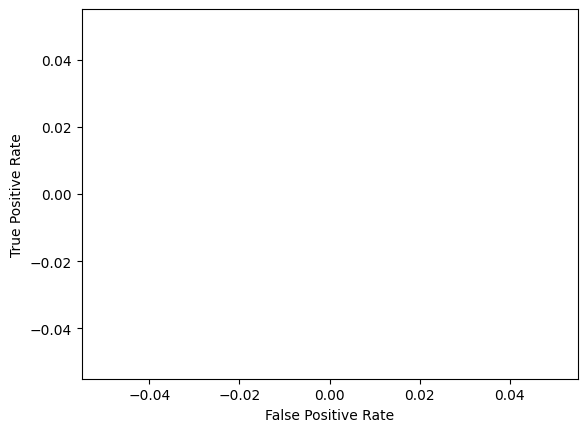

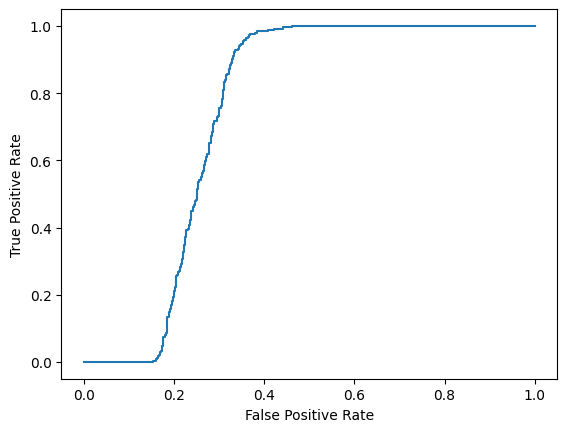

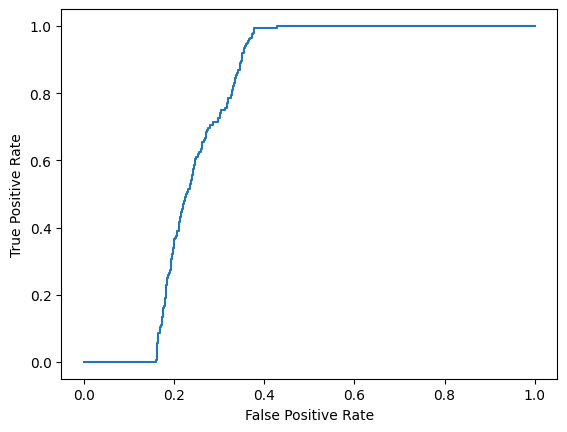

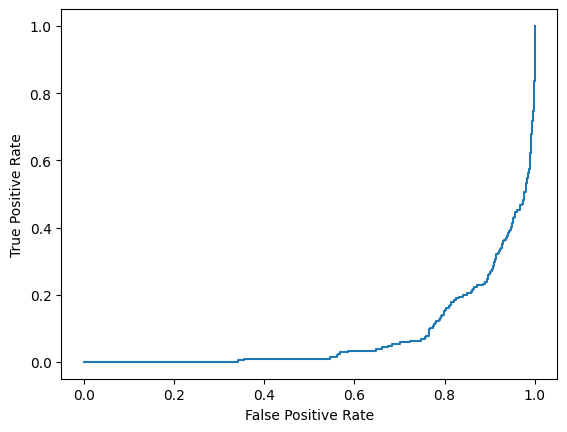

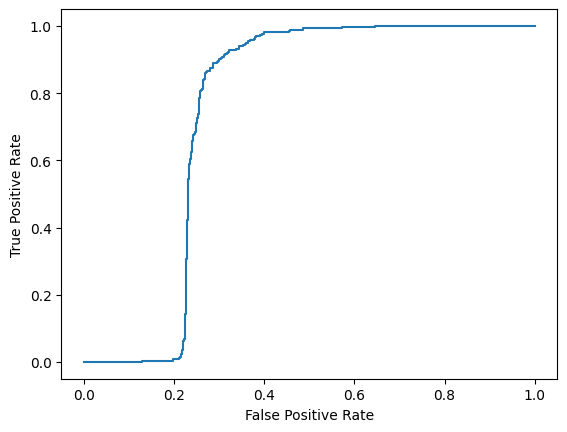

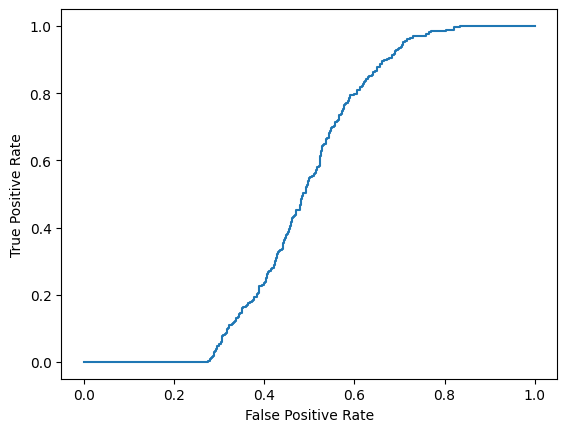

In [60]:
from sklearn.metrics import RocCurveDisplay

for label in range(6):
    fpr, tpr, thr = metrics.roc_curve(y_test==label, y_proba[:,label])
    print('threshold', label, ': ', thr)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.